In [95]:
import pandas as pd
from pprint import pprint
import pandas as pd
from glob import glob
import os
import pandas as pd
import random
random.seed(42)
pd.set_option('display.max_rows', None)


In [ ]:

df_both = pd.read_pickle("../exports/04_dictionary_features.pkl")
df_both_wo_train = df_both.copy()


In [97]:
len(df_both[df_both.Keyword.apply(lambda x:'bundle' in x)]['Sentence_dictionary'])

11

In [ ]:
opfolder = "../exports/groundtruth/T-SET"
os.makedirs(opfolder,exist_ok=True)
uid_dict = {}
# remove sentences that are already in the annotated set
for file_path in glob("../exports/groundtruth/F-SET/Annotated/*.xlsx"):
    print(file_path)
    already_annotated = pd.read_excel(file_path)
    file_name = os.path.basename(file_path)
    ET = file_name.split("_")[0]
    uid_dict[ET]=already_annotated.UID.unique().tolist()
    uid_dict[f"{ET}_value_counts"] = already_annotated.Lemma.value_counts()
    print(already_annotated.Lemma.value_counts())
    df_both_wo_train = df_both_wo_train[~df_both_wo_train.UID.isin(uid_dict[ET])]

    
    



../exports/groundtruth/Annotated/Sleep_132_222_enriched.xlsx
Lemma
<Unknown>       30
nap             30
asleep          30
sleeping        30
sleep           29
bundle          13
repletion        5
distress         5
family           5
daughter         5
eating           5
take_out         5
husband          5
urine            5
feed             5
discharge        5
bite             5
eat              5
consume          5
uncle            5
pain             5
brother          5
sister           5
mother           5
burn             5
aunt             5
father           5
breakfast        5
incontinence     5
couple           5
ache             5
lunch            5
son              5
suffer           4
relative         4
elimination      4
stitch           4
myalgia          4
taste            3
hemorrhoid       3
throb            3
waste            3
sup              3
suffering        3
consumption      2
neuralgia        2
engorgement      2
refer_pain       2
colic            2
tw

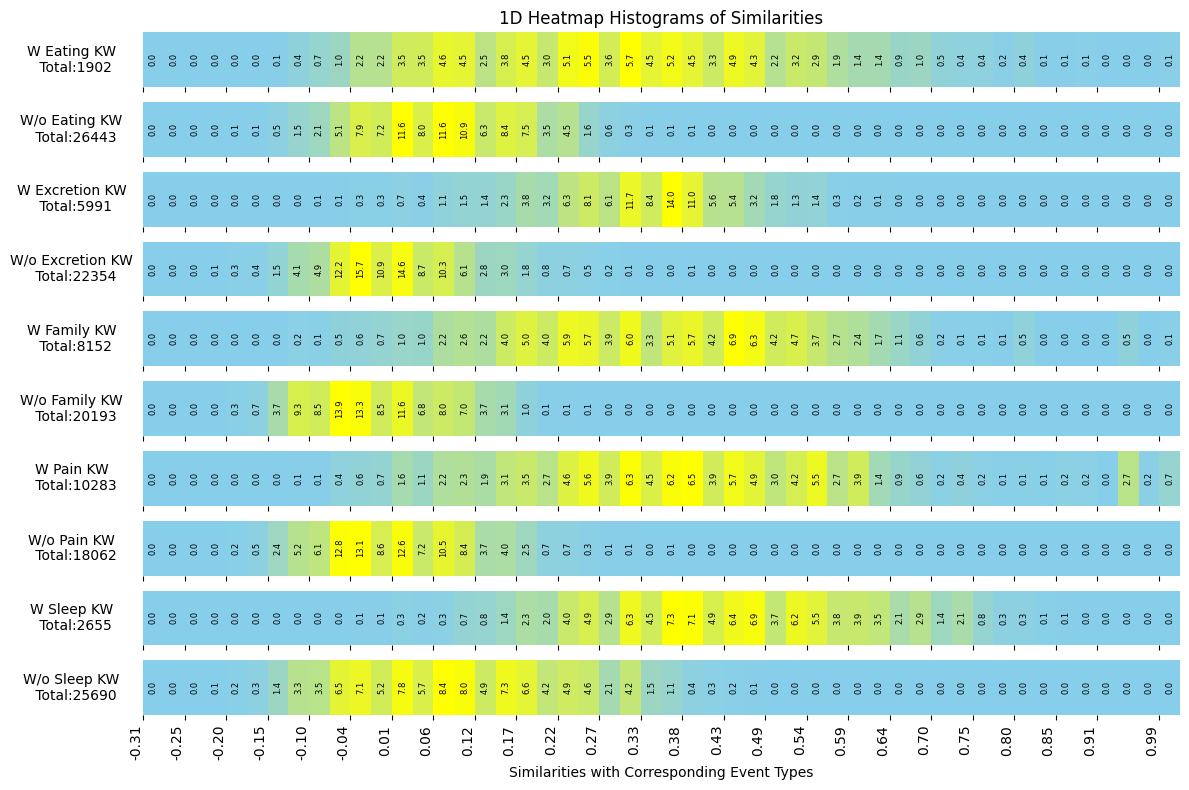

In [99]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap

# Define a custom color gradient (e.g., black → red → yellow → white)
custom_cmap = LinearSegmentedColormap.from_list(
    name='custom_gradient',
    colors=["skyblue", "yellow"]
)
def plot_axis(counts, i, ax, column, num_bins, bin_edges):

    norm_counts = counts / counts.sum() * 100

    sns.heatmap(
    [norm_counts],
    ax=ax,
    cmap=custom_cmap,
    cbar=False,
    xticklabels=False if i < len(similarity_columns) - 1 else True,
    yticklabels=False,
    annot=[norm_counts],                 # Annotations need to match the shape of data (1 row)
    fmt='0.1f',                        # Integer format
    annot_kws={"size": 6, "color": "black", "rotation": 90, "va": "center", "ha": "center"}  # Styling
)
    if i%2==0:
        pref = "W"
    else:
        pref = "W/o"
    # Label each heatmap
    ax.set_ylabel(f"{pref} {column} KW \n Total:{counts.sum()}", rotation=0, labelpad=50, va='center')
    ax.set_yticks([])

    # Only format x-ticks for the bottom axis
    if i == 9:
        # Compute bin centers
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        # Choose a few bin positions to label
        tick_indices = np.linspace(0, num_bins - 1, 25).astype(int)
        tick_labels = [f"{bin_centers[j]:.2f}" for j in tick_indices]

        # Now set ticks and labels
        ax.set_xticks(tick_indices)
        ax.set_xticklabels(tick_labels, rotation=90, ha="right")

# Similarity columns to plot
similarity_columns = [
    "Eating",
    "Excretion",
    "Family",
    "Pain",
    "Sleep"
]

# Compute global min and max for consistent binning
all_values = np.concatenate([df_both[f"{col}_similarity"].dropna().values for col in similarity_columns])
global_min, global_max = all_values.min(), all_values.max()

# Define consistent bins
num_bins = 50
bin_edges = np.linspace(global_min, global_max, num_bins + 1)

# Create subplots
fig, axes = plt.subplots(
    nrows=len(similarity_columns)*2,
    figsize=(12, 8),
    sharex=True
)

for i, ax in enumerate(axes):
    column = similarity_columns[i//2]
    event_type = column
    # if i%2 == 0:
    #     df_sel = df_both[df_both["Event_Name_dictionary"].apply(lambda x: "_".join(set(x)) == event_type )]
    # else:
    #     df_sel = df_both[df_both["Event_Name_dictionary"].apply(lambda x: event_type not in x and "_".join(set(x))!='Unknown' )]
    if i%2 == 0:
        df_sel = df_both[df_both["Event_Name_dictionary"].apply(lambda x: event_type in x )]
    else:
        df_sel = df_both[df_both["Event_Name_dictionary"].apply(lambda x: event_type not in x and "_".join(set(x))!='Unknown' )]
    counts, _ = np.histogram(df_sel[f"{event_type}_similarity"].dropna(), bins=bin_edges)

    plot_axis(counts, i, ax, column, num_bins, bin_edges)

# Add title and x label
axes[0].set_title("1D Heatmap Histograms of Similarities")
axes[-1].set_xlabel("Similarities with Corresponding Event Types")

plt.tight_layout()
plt.show()


In [100]:

import matplotlib.pyplot as plt
import seaborn as sns


def get_pd_curves(df, cat='Lemma', meas=None, label=""):
    return None

    # Prepare unique lemmas
    cats = df[cat].value_counts().reset_index()[cat][:20]
    print(df[cat].value_counts())
    # Set up the plot
    plt.figure(figsize=(10, 6))

    # Optional: custom color palette
    palette = sns.color_palette("husl", len(cats))

    # Plot individual lemma distributions
    for i, lemma in enumerate(cats):
        subset = df[df[cat] == lemma]
        sns.kdeplot(
            subset[meas].dropna(),
            bw_adjust=1,
            label=lemma,
            color=palette[i],
            fill=False
        )

    # 🔁 Plot combined curve (all cats together)
    # sns.kdeplot(
    #     df[meas].dropna(),
    #     bw_adjust=1,
    #     label=f"All {cat}s",
    #     color="black",
    #     linestyle="--",
    #     linewidth=2,
    #     fill=False
    # )
    
    plt.figure()
    sns.histplot(
        df[meas].dropna(),
        label=f"All {cat}s",
        bins=15
    )

    # Customize plot
    plt.xlabel(meas)
    plt.ylabel('Density')
    plt.title(f'{meas} Distributions by {cat}')
    plt.legend(title=cat, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f"../exports/images/event_specific/{label}_event_type_{meas}.png")
    plt.show()
    print(df["Lemma"].value_counts())
import os
os.makedirs("../exports/images/event_specific/", exist_ok=True)
df_both_w_ET = {}
df_both_wo_ET = {}
# Explode and filter
def weight_inverted_gaussian(x, k=10):
    return 1 - np.exp(-k * (x - 0.5)**2)
for col in ['Event_Name_dictionary', 'Keyword', 'Lemma']:
    df_both[f"{col}_bkp"] = df_both[col].copy()
     
for ET in similarity_columns:
    df_both_w_ET[ET] = df_both[df_both.Event_Name_dictionary.apply(lambda x: ET in x)].drop_duplicates("Sentence_dictionary")
    df_both_wo_ET[ET] = df_both[df_both.Event_Name_dictionary.apply(lambda x: ET not in x)].drop_duplicates("Sentence_dictionary")

    df_both_w_ET[ET] = df_both_w_ET[ET].explode(['Event_Name_dictionary', 'Keyword', 'Lemma'])
    df_both_w_ET[ET] = df_both_w_ET[ET][df_both_w_ET[ET].Event_Name_dictionary==ET]
    

    df_both_wo_ET[ET] = df_both_wo_ET[ET].explode(['Event_Name_dictionary', 'Keyword', 'Lemma'])
    df_both_wo_ET[ET]['Lemma'] = df_both_wo_ET[ET]['Lemma'].apply(lambda x: x if x!='' else "<Unknown>")


    get_pd_curves(df_both_w_ET[ET],'Lemma',f'{ET}_similarity', label="With_Event_Before")
    get_pd_curves(df_both_wo_ET[ET],'Lemma',f'{ET}_similarity', label="Without_Event_Before")



    # Step 2: Add weight column
    df_both_w_ET[ET] = df_both_w_ET[ET].copy()
    df_both_w_ET[ET]["sampling_weight"] = df_both_w_ET[ET][f'{ET}_similarity'].apply(weight_inverted_gaussian)
    df_both_wo_ET[ET] = df_both_wo_ET[ET].copy()
    df_both_wo_ET[ET]["sampling_weight"] = df_both_wo_ET[ET][f'{ET}_similarity'].apply(weight_inverted_gaussian)



In [101]:
display(df_both_w_ET['Sleep'].Lemma.value_counts())
# previous_df

Lemma
sleep       1369
sleeping     724
asleep       439
nap          267
bundle        15
Name: count, dtype: int64

In [ ]:
import pandas as pd
import numpy as np

samples_per_bin_per_lemma_w_ET = 6
samples_per_bin_per_lemma_wo_ET = 1
samples_per_bin_per_unknown_lemma_w_ET = 6



import pandas as pd
import numpy as np

def bin_and_sample(df, similarity_col='Sleep_similarity', lemma_col='Lemma', bins=5, samples_per_bin=6):
    global samples_per_bin_per_unknown_lemma_w_ET,previous_df,current_df,borrowed_count, uid_to_gt
    sampled_dfs = []
    bin_edges = {}
    ET=similarity_col.split('_')[0]
   
    for ind,(lemma, group) in enumerate(df.groupby(lemma_col)):
        this_lemma_prev = previous_df[previous_df.Lemma == lemma].copy()
        group = group.copy()
        bin_edges[lemma] = np.histogram_bin_edges(group[similarity_col], bins=bins)
        group['bin'] = pd.cut(group[similarity_col], bins=bin_edges[lemma], labels=False, include_lowest=True)
        for b in range(len(bin_edges[lemma]) - 1):
            bin_group = group[group['bin'] == b]
            if not bin_group.empty:
                lower_bound = bin_group[similarity_col].min()
                upper_bound = bin_group[similarity_col].max()
                # print(this_lemma_prev[similarity_col].value_counts())
                old_samples = this_lemma_prev[(this_lemma_prev[similarity_col]>=lower_bound) & (this_lemma_prev[similarity_col]<=upper_bound)]
                # print(lower_bound, upper_bound,len(old_samples))
                new_samples = current_df[(current_df.Lemma==lemma) & (current_df[similarity_col]>=lower_bound) & ((current_df[similarity_col]<=upper_bound))]
                if lemma == "<Unknown>":
                    samples_per_bin=samples_per_bin_per_unknown_lemma_w_ET
                sample_size = len(old_samples)
                
                if len(new_samples)>=sample_size:
                    sampled = new_samples.sample(sample_size, random_state=42)
                    extra_samples = new_samples.iloc[:0]
                else:
                    extras_to_sample = sample_size-len(new_samples)
                    extra_samples = old_samples.sample(extras_to_sample, random_state=42)
                    borrowed_count += len(extra_samples)
                    if len(new_samples) == 0:
                        sampled = extra_samples
                    else:
                        sampled = pd.concat([new_samples, extra_samples])          
                alternative_samples = bin_group.sample(min(samples_per_bin, len(bin_group)), random_state=42)  
                # print(lemma, lower_bound,upper_bound,len(old_samples),len(new_samples), len(sampled), len(alternative_samples), len(new_samples), len(extra_samples))
                # print(
                #         f"Lemma: {lemma} | "
                #         f"Bin Range: [{lower_bound:.2f}, {upper_bound:.2f}] | "
                #         f"Old: {len(old_samples)} | "
                #         f"New: {len(new_samples)} | "
                #         f"Sampled: {len(sampled)} | "
                #         f"Alternative: {len(alternative_samples)} | "
                #         f"New (repeated): {len(new_samples)} | "
                #         f"Extra: {len(extra_samples)}"
                #     )

                assert(len(old_samples)== len(sampled))
                sampled['bin'] = b
                sampled_dfs.append(sampled)
        this_lemma = pd.concat(sampled_dfs)
        # print(lemma,len(this_lemma),len(this_lemma_prev))
        assert len(this_lemma_prev) == len(this_lemma)
    sampled_df = pd.concat(sampled_dfs).drop(columns='bin')
    return sampled_df

# Step 3: Sample from each Lemma group
for ET in ["Sleep","Excretion"]:#similarity_columns:
    borrowed_count = 0
    previous_df = pd.read_pickle(glob(f"../exports/groundtruth/F-SET/Generated/{ET}*.pkl")[0])
    
    previous_df_excel = pd.read_excel(glob(f"../exports/groundtruth/F-SET/Annotated/{ET}*.xlsx")[0])
    print(previous_df_excel[f"gt_{ET}"].value_counts())
    assert(len(previous_df)==len(previous_df_excel))
    index_to_gt = previous_df_excel[f"gt_{ET}"].to_dict()
    previous_df[f"gt_{ET}"] = previous_df.index.map(index_to_gt)
    print(previous_df[f"gt_{ET}"].value_counts())
    current_df = pd.read_excel(glob(f"../exports/groundtruth/Test/Annotated/{ET}*.xlsx")[0])
    p_et_lemma = {}
    c_et_lemma = {}
    kw_present_sampled_df = (
    df_both_w_ET[ET]
    .groupby("Lemma", group_keys=False)
    .apply(lambda g: bin_and_sample(
        df=g, similarity_col=f"{ET}_similarity",
        lemma_col = "Lemma", bins=5,
        samples_per_bin=samples_per_bin_per_lemma_w_ET
    )))
    print(ET,borrowed_count)
    borrowed_count=0
    kw_not_present_sampled_df = (
        df_both_wo_ET[ET]
        .groupby("Lemma", group_keys=False)
        .apply(lambda g: bin_and_sample(
            df=g, similarity_col=f"{ET}_similarity",
            lemma_col = "Lemma", bins=5,
            samples_per_bin=samples_per_bin_per_lemma_wo_ET
    )))
    print(ET,borrowed_count)
    
    
    get_pd_curves(kw_present_sampled_df,'Lemma',f'{ET}_similarity', label="With_Event_After")
    get_pd_curves(kw_not_present_sampled_df,'Lemma',f'{ET}_similarity', label="Without_Event_After")
    import os
    os.makedirs("../exports/groundtruth/T-SET/Annotated", exist_ok=True)
    kw_present_sampled_df['is_keyword_present'] = True
    
    # print(kw_present_sampled_df.Lemma.value_counts())
    # print(kw_not_present_sampled_df.Lemma.value_counts())
    kw_not_present_sampled_df['is_keyword_present'] = False
    combined_kw_present_not_present_sampled_df = pd.concat([kw_present_sampled_df,kw_not_present_sampled_df], ignore_index=True)
    # combined_kw_present_not_present_sampled_df[f"gt_{ET}"] = False
    assert(len(previous_df)==len(combined_kw_present_not_present_sampled_df))
    print(combined_kw_present_not_present_sampled_df[f"gt_{ET}"].value_counts())
    combined_kw_present_not_present_sampled_df.to_pickle(f"../exports/groundtruth/T-SET/Annotated/{ET}_{len(kw_present_sampled_df)}_{len(kw_not_present_sampled_df)}.pkl")
    combined_kw_present_not_present_sampled_df.to_excel(f"../exports/groundtruth/T-SET/Annotated/{ET}_{len(kw_present_sampled_df)}_{len(kw_not_present_sampled_df)}.xlsx", index=False)



gt_Sleep
0    241
1    113
Name: count, dtype: int64
gt_Sleep
0    241
1    113
Name: count, dtype: int64
Sleep 28


/tmp/ipykernel_3234548/3918566056.py:87: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: bin_and_sample(
/tmp/ipykernel_3234548/3918566056.py:97: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: bin_and_sample(


Sleep 62
gt_Sleep
0    236
1    118
Name: count, dtype: int64
gt_Excretion
0    253
1     74
Name: count, dtype: int64
gt_Excretion
0    253
1     74
Name: count, dtype: int64
Excretion 46


/tmp/ipykernel_3234548/3918566056.py:87: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: bin_and_sample(


Excretion 66
gt_Excretion
0    253
1     74
Name: count, dtype: int64


/tmp/ipykernel_3234548/3918566056.py:97: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: bin_and_sample(


In [ ]:
import pandas as pd
from glob import glob
ET= "Sleep"
df = pd.read_pickle(glob(f"../exports/groundtruth/T-SET/Annotated/{ET}*.pkl")[0])
df = df.groupby("UID")["is_keyword_present"].max().reset_index()
df.is_keyword_present.value_counts()

is_keyword_present
False    220
True     130
Name: count, dtype: int64

In [ ]:
bins=5
orig_bins = {}
new_bins = {}
for ET in ["Sleep", "Excretion"]:
    previous_file = (glob(f"../exports/groundtruth/F-SET/Annotated/{ET}*.xlsx")[0])
    current_file = (glob(f"../exports/groundtruth/T-SET/Annotated/{ET}*.xlsx")[0])
    previous_df = pd.read_excel(previous_file)
    current_df = pd.read_excel(current_file)
    for Lemma in previous_df.Lemma.unique():
        orig_bins = np.histogram_bin_edges(df_both[df_both.Lemma==Lemma][f"{ET}_similarity"], bins=bins)
        new_bins = np.histogram_bin_edges(combined_kw_present_not_present_sampled_df[combined_kw_present_not_present_sampled_df.Lemma==Lemma][f"{ET}_similarity"], bins=orig_bins)
        p_Lemma = previous_df[previous_df.Lemma == Lemma]
        c_Lemma = current_df[current_df.Lemma == Lemma]
        if len(p_Lemma) != len(c_Lemma):
            print('not_ok', Lemma, len(p_Lemma), len(c_Lemma))
            # plt.figure()
            # p_Lemma[f'{ET}_similarity'].hist(bins=orig_bins, label='old')
            # c_Lemma[f'{ET}_similarity'].hist(bins=orig_bins,  label='new')
            # plt.show()

UnpicklingError: A load persistent id instruction was encountered, but no persistent_load function was specified.

In [ ]:
for ET in ["Pain", "Sleep", "Excretion", "Eating", "Family"]:
    display(ET, df_both.Event_Name_dictionary.apply(lambda x: ET in x).sum())
    
for ET in ["Pain", "Sleep", "Excretion", "Eating", "Family"]:
    display( len(df_both_w_ET[ET]), df_both_w_ET[ET].Lemma.value_counts().reset_index(), kw_present_sampled_df.Lemma.value_counts())